In [2]:
# Importing packages

import json
import numpy as np

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
# Set data setup

image_size = (224, 224)
batch_size = 32

In [4]:
# Set dataset train

train_ds = tf.keras.preprocessing.image_dataset_from_directory("D:/SkinClassii/train_folder/train/",
                                                                  image_size=image_size, batch_size=batch_size,color_mode="rgb")

Found 15778 files belonging to 7 classes.


In [5]:
# Set dataset validation

val_ds = tf.keras.preprocessing.image_dataset_from_directory("D:/SkinClassii/train_folder/val/",
                                                                  image_size=image_size, batch_size=batch_size,color_mode="rgb")

Found 2000 files belonging to 7 classes.


In [6]:
 #Set dataset test

test_ds = tf.keras.preprocessing.image_dataset_from_directory("D:/SkinClassii/train_folder/test/",
                                                                  image_size=image_size, batch_size=batch_size,color_mode="rgb")

Found 1008 files belonging to 7 classes.


(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)


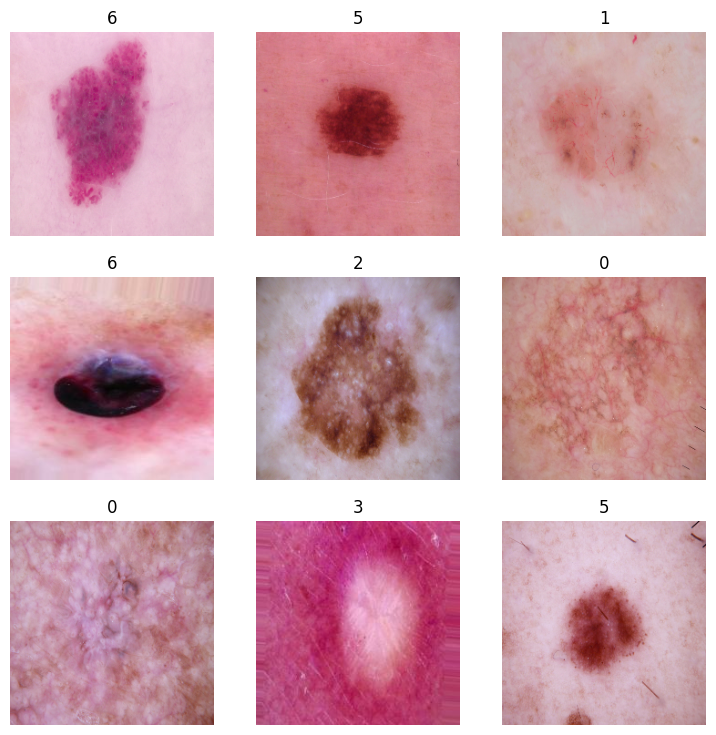

In [7]:
# Plot pictures of data 

plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
#         plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
        print(images.shape)

In [8]:
# Set autotiune vor dataset

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [9]:
# Labels for data

labels_types={"Choroba Bowena(akiec)" : 0, "Rak podstawnokomórkowy(bcc)" : 1, "Łagodne zmiany przypominające rogowacenie(bkl)" : 2, "Dermatofibroma(df)" : 3, "Czerniak(mel)" : 4, "Znamiona melanocytowe(nv)" : 5, "Zmiany naczyniowe(vasc)" : 6}

In [10]:
# Callback for testing data

save_callback = tf.keras.callbacks.EarlyStopping(patience=2)

In [11]:
# Transfer learning model

base_model = tf.keras.applications.ConvNeXtTiny(
    model_name="convnext_tiny",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

base_model.trainable = False

In [12]:
# Build full model with layers to interprate pictures

model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    base_model,
    tf.keras.layers.Dense(7)])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)      │ (None, 1000)           │    28,589,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         7,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,596,135 (109.09 MB)

 Trainable params: 7,007 (27.37 KB)

 Non-trainable params: 28,589,128 (109.06 MB)

In [13]:
# Model compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# # Fit model with 3 epochs

# initial_epochs=5

# history = model.fit(train_ds,
#                     epochs=initial_epochs,
#                     validation_data=val_ds, callbacks=save_callback)

In [15]:
# Sử dụng mô hình ResNet50
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

base_model.trainable = False

# Xây dựng mô hình đầy đủ
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(7, activation='softmax')
])

# Tóm tắt mô hình
model.summary()

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/SkinClassii/train_folder/train/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/SkinClassii/train_folder/val/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 15778 files belonging to 7 classes.
Using 12623 files for training.
Found 2000 files belonging to 7 classes.
Using 400 files for validation.


In [16]:
# Huấn luyện mô hình với 3 epochs
initial_epochs = 15

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds,
                    callbacks=save_callback)


Epoch 1/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 553s 1s/step - accuracy: 0.7582 - loss: 0.7414 - val_accuracy: 0.7175 - val_loss: 0.7614
Epoch 2/15
 84/395 ━━━━━━━━━━━━━━━━━━━━ 6:55 1s/step - accuracy: 0.8686 - loss: 0.3974

In [ ]:
# Plot fiting stats

plt.figure(figsize = (15,12))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

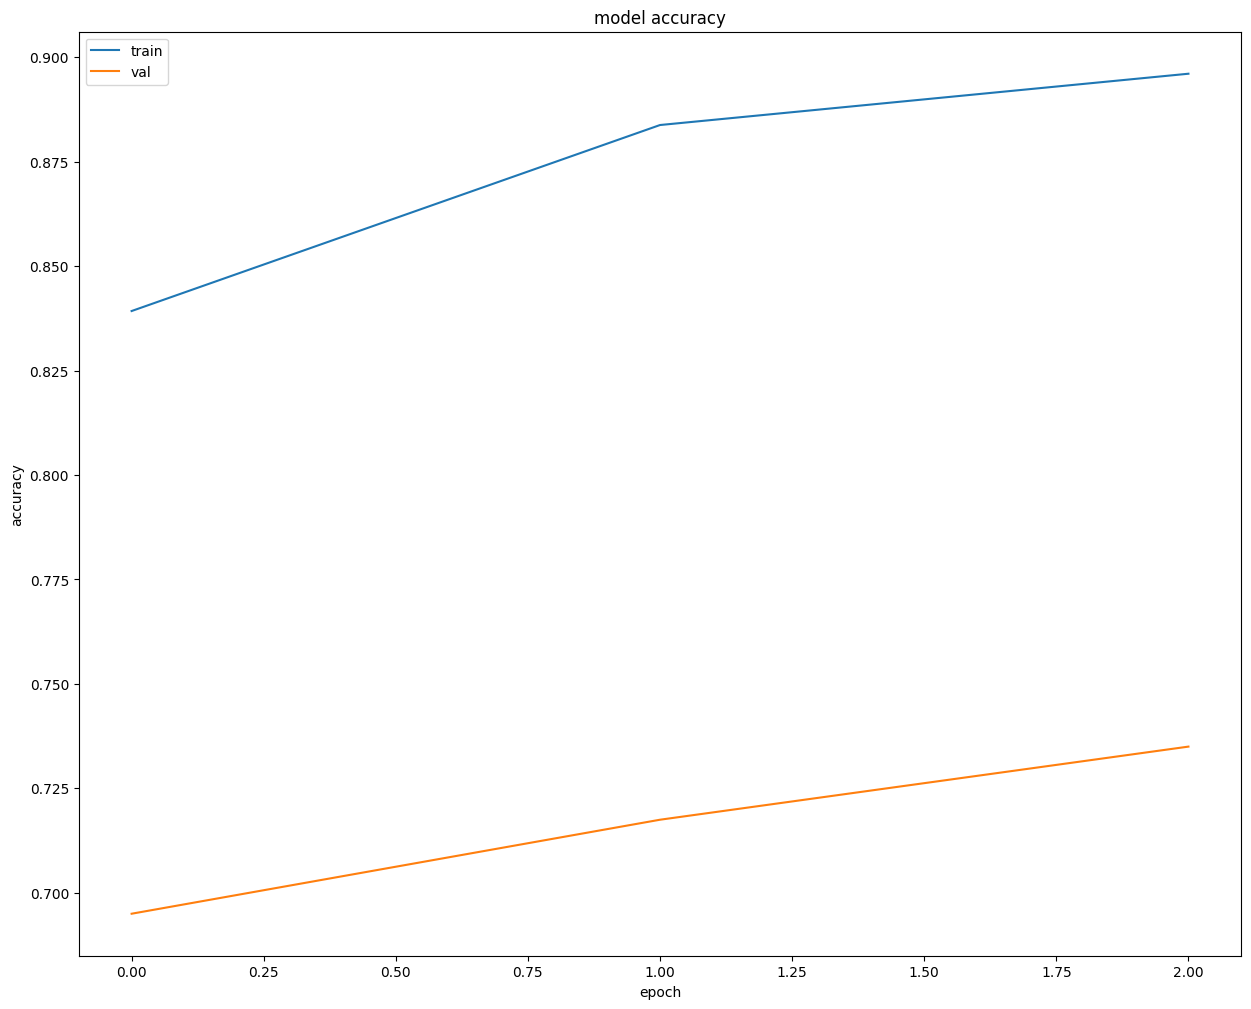

In [ ]:
# # Plot fiting stats

# plt.figure(figsize = (15,12))
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [ ]:
# Evaluate fited model

results = model.evaluate(test_ds)
print("test loss, test acc:", results)

63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7161 - loss: 0.7515
test loss, test acc: [0.7305510640144348, 0.7315000295639038]


In [ ]:
# Predictions for test data

predictions = model_load.predict(test_ds)

NameError: name 'model_load' is not defined

In [ ]:
# Save model to tf file

model.save('/SkinClassii/modelnew.keras')


In [ ]:
# Summary loaded model
# Load saved model
from tensorflow.keras.models import load_model


model_load = load_model('/SkinClassii/model_tf.h5')
model_load.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │        14,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,602,057 (90.03 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Predictions for test data

predictions = model_load.predict(test_ds)

63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step


<Figure size 1500x1200 with 0 Axes>

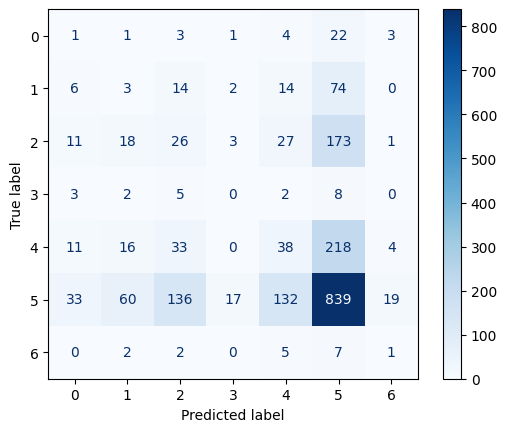

In [ ]:
# Plot matrix 

plt.figure(figsize = (15,12))

predicted_categories = tf.argmax(predictions, axis=1)

true_categories = tf.concat([y for x, y in test_ds], axis=0)

cm = confusion_matrix(predicted_categories, true_categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Building custom neural network and compile

num_classes = 7

model_cust = tf.keras.Sequential([
  tf.keras.layers.Conv2D(224, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(224, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(224, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
 
model_cust.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
history_cust = model_cust.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=save_callback)

NameError: name 'tf' is not defined